# 이미지 이상탐지모델(GAN)

- 공항 출국장에서 수하물 X-선 검사를 받으면서 보안검사를 받아보신 경험들이 한번쯤 있으시겠죠? 실은 비단 여러분들의 수하물 정도가 아니라 비행기에 실리고 내리는 모든 화물들에 대해 보이지 않는 어딘가에서 X-선으로 꼼꼼이 검사를 하고 있답니다. 그러기 위해 보안 검사원들이 불철주야 수고를 하고 계신데요, 블랙프라이데이 같은 시즌이 도래하면 하루에도 똑같은 가방 수천개가 컨베이어벨트를 지나가는 것을 눈을 떼지 못하고 X-선으로 지켜보고 있어야만 하는 세관 검사원들의 웃지못할 이야기도 있다고 합니다.

- 딥러닝 기술이 유용하게 사용될 수 있는 대표적인 사례로 바로 이상감지(Anomaly Detection)를 꼽을 수 있습니다. 위 그림에서처럼 혹시라도 위험한 물품이 포함되어 있지 않을까 24시간 사람이 뚫어져라 모니터를 쳐다보고 있어야만 하는 고된 일을 인공지능이 대신 정확하게 수행해 줄 수 있다면 좋겠죠? 이런 과제는 실제로 공항, 항만, 주요 군사시설 등에서 매우 관심을 가지고 진행하고 있답니다. 그런데 이런 이상감지 모델로 GAN 기술이 유용하게 활용되고 있다고 합니다.

- 왜 그럴까요? 그냥 쉽게 생각할 수 있는 지도학습(supervised learning)으로는 어려울까요? 네 그렇습니다. 이상감지 태스크의 경우, 정상(Normal) 상황에 대한 데이터는 아주 풍부하게 얻을 수 있지만, 이상(Anomaly) 상황에 대한 데이터는 매우 부족할 뿐 아니라 사실상 모든 케이스의 이상 상황을 정의할 수조차 없기 때문입니다. 이 때 GAN이 사용된다면 이상(Anomaly) 데이터가 충분하지 않은 경우에도 꽤 쓸만한 이상감지 성능을 발휘하는 모델을 만들 수 있다고 합니다.

- 그럼 어떻게 이런 모델을 만들어 가는 것인지, 함께 알아보도록 할까요?

## 학습목표
- 이상(Anomaly) 데이터가 부족한 상황에서 GAN을 이용해 이미지 이상감지 모델을 구축하는 논리를 파악한다.
- Skip-GANomaly 모델 및 Loss 함수를 구현해 본다.
- 간단한 데이터셋을 이용해 Skip-GANomaly 의 이상감지 효과를 파악해 본다.

## 학습 목차
- Anomaly Detection with GAN
- GANomaly
- Skip-GANomaly
- 데이터셋 구성
- 모델과 Loss함수 구성
- 모델 학습과 평가

## 평가 루브릭

- 아래의 기준을 바탕으로 프로젝트를 평가합니다.

###  평가문항	상세기준
1. Anomaly Detection 태스크 특성에 맞도록 데이터셋 가공이 진행되었다.: 개구리 클래스가 배제되어 테스트셋에만 반영되는 로직이 구현되었다.
2. Skip-GANomaly 모델이 정상적으로 구현되었다.: 모델 학습 및 테스트가 원활하게 진행되었다.
3. 이상감지 수행 결과가 체계적으로 시각화되었다. : Anomaly score 분호, 테스트셋 이상감지 정확도(%), 이상감지 성공실패사례 제시가 진행되었다.

# Anomaly Detection with GAN

- 2017년에 발표된 Unsupervised Anomaly Detection with Generative Adversarial Networks to Guide Marker Discovery라는 논문에서 AnoGAN이라는 모델을 제안합니다. 논문의 내용은 제목에 그대로 담겨 있는데요, GAN을 이용하면 Anomaly 데이터가 부족한 상황에서도 Unsupervised 방식으로 Anomaly Detection 모델 구현이 가능하다는 아이디어입니다.

- 이게 어떻게 가능한 것일까요?

![title](E-28-01.max-800x600.png)

- 위 그림을 봅시다. 얼핏 보면 흔히 보는 GAN의 모델 구조를 가지고 있습니다. 여기서 중요한 것은 학습데이터로 Anomal하지 않은 정상(normal) 데이터만 사용한다는 점입니다. 그렇다면 GAN의 원리에 의해 Discriminator(빨간색)은 정상적인 이미지와 Generator(푸른색)만들어 낸 가짜 이미지를 잘 구분하게 될 것이고, Generator는 그런 Discriminator를 속이기 위해 정상 데이터같은 이미지를 만들어 낼 것입니다.

- 여기서 AnoGAN의 저자들은 이런 생각을 했습니다. 잘 훈련된 GAN의 Generator x=G(z)란 바로 Latent variable z와 이미지 x 사이의 어떤 맵핑을 나타내는 함수가 아닐까? 그렇다면 Normal 데이터를 잘 만들어낼 수 있는 z의 영역을 (z를 수없이 샘플링해 가면서) 더듬더듬 찾아내면 위 그림의 오른쪽과 같은 윤곽이 얻어지게 될 수 있지 않을까?

- 그래서 추가적인 Loss 2개를 아래와 같이 정의합니다.

![title](GANomaly.png)

- 그다음 아이디어는 어찌보면 당연한 것입니다. 지금까지 학습한 GAN의 Generator와 Discriminator는 모두 Normal 데이터에 대해서만 최적화된 파라미터를 가지고 있으며, Generator가 정상데이터처럼 보이도록 만드는 $ z_γ\\ $ 까지 찾아두었다면, Normal한 x에 대해서는 위 Loss값이 아주 작을 것입니다. 그러나 Anomaly 데이터 $ x $에 대해서는 이 Loss값이 일정 threshold 이상으로 치솟게 될 것이라는 논리입니다.

# EGBAD (feat. by BiGAN)

![title](BiGAN.png)

# GANomaly

![title](GANomaly1.png)

![title](GANomaly2.png)


# Skip-GANomaly

![title](Skip-GANomaly1.png)

![title](Skip-GANomaly2.png)


# 데이터셋 구성(Fashion-MNIST)

- 지금부터는 Skip-GANomaly 모델을 실제로 구현하는 과정을 진행하려고 합니다. 이런 이상감지 모델을 학습할 때 쉽게 사용하는 데이터 구성은 MNIST 같이 잘 알려진 데이터셋에서 특정 클래스를 이상 데이터로 활용하는 방식입니다. 예를 들어 0으로 라벨링된 모든 이미지를 훈련 데이터에서 제거하고 1~9로만 학습을 시킨 후 테스트 데이터를 0을 포함한(이상 데이터를 포함한) 형태로 구성하여 이상감지 성능을 평가하는 방식입니다.

- 오늘 우리는 Fashion MNIST를 활용해 볼 것입니다. Fashion MNIST에서 8번 라벨이 가방(Bag)입니다. 그래서 이번에는 가방을 제거하고 의복과 신발류로만 구성된 Fashion MNIST를 정상 데이터로 삼아볼 생각입니다. 말하자면, 우리의 모델은 가방이라는 패션 아이템을 보도듣도 못하였으며, 가방이라는 패션이라는 것은 매우 특이한 상황이라고 가정하는 것입니다^^

In [1]:
import tensorflow as tf

from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, precision_recall_curve, average_precision_score
from scipy.interpolate import interp1d
from inspect import signature
from scipy.optimize import brentq

import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os

import PIL
from tensorflow.keras import layers
import time
from scipy.stats import norm

from IPython import display

# 이상감지 데이터셋 구축

- 위에서 언급한 대로 학습/테스트 데이터셋을 구축해 보겠습니다.

- (주의) Fashion-MNIST는 1채널 grayscale 데이터셋입니다. 그냥은 Convolution 연산이 되지 않으므로 채널방향 차원이 하나 늘어나도록 reshape하는 과정이 필요합니다. 
- (주의) UNet 구조의 활용을 위해서 기존의 28 X 28 사이즈의 Fashion-MNIST 데이터 이미지를 32 X 32 로 패딩처리해 줄 필요가 있습니다.

In [2]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

train_data = (train_data - 127.5) / 127.5
test_data = (test_data - 127.5) / 127.5

from PIL import Image

# Fashion MNIST padding to 32 X 32
train_data_32 = np.zeros((train_data.shape[0], 32, 32)).astype('float32')
test_data_32 = np.zeros((test_data.shape[0], 32, 32)).astype('float32')     
train_data_32[:, 2:30, 2:30] = train_data
test_data_32[:, 2:30, 2:30] = test_data

# 1channel data reshape
train_data = train_data_32.reshape(train_data_32.shape[0], 32, 32, 1).astype('float32')
test_data = test_data_32.reshape(test_data_32.shape[0], 32, 32, 1).astype('float32')

print(train_data.shape)
print(test_data.shape)

(60000, 32, 32, 1)
(10000, 32, 32, 1)


- 잠깐 Fashion-MNIST 데이터가 어떻게 생겼는지 확인해 볼까요?

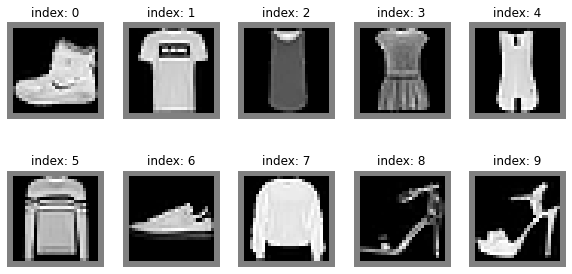

In [3]:
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_data[i].reshape(32, 32), cmap='gray')
    plt.title(f'index: {i}')
    plt.axis('off')
plt.show()

- 위에서 설명한 대로 이상 데이터로 선정된 8번 라벨(Bag) 데이터를 제외하도록 하겠습니다.

In [4]:
def set_labels(labels):
    new_t_labels = []
    for old_label in labels:
        if old_label == 8:   # Bag:8
            new_t_labels.append([0])  # Bag을 이상치로 처리
        else:
            new_t_labels.append([1])  # 그 외의 경우는 정상치
             
    return np.array(new_t_labels)

In [5]:
bol_train_labels = set_labels(train_labels)
bol_test_labels = set_labels(test_labels)

In [6]:
normal_data = []
normal_labels = []
anomaly_data = []
anomaly_labels = []
for data, label in zip(train_data, bol_train_labels):
    if label == 0:
        anomaly_data.append(data)
        anomaly_labels.append(label)
    else:
        normal_data.append(data)
        normal_labels.append(label)
        
normal_data = np.array(normal_data)
normal_labels = np.array(normal_labels)
anomaly_data = np.array(anomaly_data)
anomaly_labels = np.array(anomaly_labels)

In [7]:
print(normal_data.shape, normal_labels.shape)
print(anomaly_data.shape, anomaly_labels.shape)

(54000, 32, 32, 1) (54000, 1)
(6000, 32, 32, 1) (6000, 1)


In [8]:
train_data = normal_data
bol_train_labels = normal_labels
test_data = tf.concat([test_data, anomaly_data], 0)
bol_test_labels = tf.concat([bol_test_labels, anomaly_labels], 0)

In [9]:
print(train_data.shape)
print(test_data.shape)

(54000, 32, 32, 1)
(16000, 32, 32, 1)


In [10]:
print(bol_train_labels.shape)
print(bol_test_labels.shape)

(54000, 1)
(16000, 1)


- 어떻습니까? 60000건의 훈련데이터 중 6000건이 제외되어 10000건의 테스트 데이터에 추가되었습니다. 계산이 맞아떨어지나요?

- 데이터셋이 정확하게 구성되었는지 좀더 검증해 보겠습니다.

In [11]:
for label in bol_train_labels:
    if label == 0:
        print(label)
print("Done")

Done


- 이제 데이터셋을 구성하고 label을 검증해 보겠습니다.

- 훈련 데이터셋에는 라벨이 1인 데이터만 존재하고, 테스트 데이터에는 0과 1이 섞여 있어야 합니다.

In [12]:
BUFFER_SIZE = 10000
BATCH_SIZE = 8

train_dataset = tf.data.Dataset.from_tensor_slices((train_data, bol_train_labels))
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

test_dataset = tf.data.Dataset.from_tensor_slices((test_data, bol_test_labels))
test_dataset = test_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [13]:
for data, label in train_dataset.take(1):
    print(label)

tf.Tensor(
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]], shape=(8, 1), dtype=int64)


In [14]:
for data, label in test_dataset.take(1):
    print(label)

tf.Tensor(
[[1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]], shape=(8, 1), dtype=int64)


# 모델과 Loss함수 구성
## Generator
- 이제 본격적으로 모델을 구성해 보겠습니다. Generator는 그동안 자주 다루었을 UNet 구조를 따릅니다.

In [15]:
class Conv_block(tf.keras.Model):
    def __init__(self, num_filters):
        super(Conv_block, self).__init__()
        self.conv_layer = tf.keras.Sequential([
            layers.Conv2D(num_filters, 3, strides=2, padding='same', use_bias=False,
                          kernel_initializer=tf.random_normal_initializer(0., 0.02)),
            layers.BatchNormalization(),
            layers.LeakyReLU(0.2),
        ])
        
    def call(self, inputs, training=False):
        outputs = self.conv_layer(inputs)
        
        return outputs

In [16]:
class Conv_T_block(tf.keras.Model):
    def __init__(self, num_filters):
        super(Conv_T_block, self).__init__()
        self.conv_T_layer = tf.keras.Sequential([
            layers.Conv2DTranspose(num_filters, 3, strides=2, padding='same', use_bias=False,
                                   kernel_initializer=tf.random_normal_initializer(0., 0.02)),
            layers.BatchNormalization(),
            layers.ReLU(),
        ])
        
    def call(self, inputs, concat, training=False):
        upsample = self.conv_T_layer(inputs)
        outputs = tf.concat([upsample, concat], -1)
        
        return outputs

In [17]:
class Generator(tf.keras.Model):
    def __init__(self, num_output_channel=3):
        super(Generator, self).__init__()
        self.encoder_1 = Conv_block(64) # 16
        self.encoder_2 = Conv_block(128) # 8
        self.encoder_3 = Conv_block(256) # 4
        self.encoder_4 = Conv_block(512) # 2
        
        self.center = Conv_block(512) # 1
        
        self.decoder_4 = Conv_T_block(512) # 2
        self.decoder_3 = Conv_T_block(256) # 4
        self.decoder_2 = Conv_T_block(128) # 8
        self.decoder_1 = Conv_T_block(64) # 16
        
        self.output_layer = layers.Conv2DTranspose(num_output_channel, 1, strides=2, padding='same', use_bias=False, # 32
                                                   kernel_initializer=tf.random_normal_initializer(0., 0.02))
                
    def call(self, inputs, training=False):
        en_1 = self.encoder_1(inputs) # gen
        en_2 = self.encoder_2(en_1)
        en_3 = self.encoder_3(en_2)
        en_4 = self.encoder_4(en_3)
        
        center = self.center(en_4)
        
        de_4 = self.decoder_4(center, en_4)
        de_3 = self.decoder_3(de_4, en_3)
        de_2 = self.decoder_2(de_3, en_2)
        de_1 = self.decoder_1(de_2, en_1)
        
        outputs = self.output_layer(de_1)
        
        return outputs

# Discriminator
- Discriminator도 Generator처럼 Conv_block을 활용하며, 최종적으로 sigmoid를 거쳐 0~1 사이의 숫자를 리턴합니다.

In [18]:
class Discriminator(tf.keras.Model):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.encoder_1 = Conv_block(64) # 16
        self.encoder_2 = Conv_block(128) # 8
        self.encoder_3 = Conv_block(256) # 4
        self.encoder_4 = Conv_block(512) # 2
        
        self.center = Conv_block(100) # 1
        
        self.outputs = layers.Conv2D(1, 3, strides=1, padding='same',
                                          use_bias=False, activation='sigmoid')
    
    def call(self, inputs, training=False):
        en_1 = self.encoder_1(inputs) # dis
        en_2 = self.encoder_2(en_1)
        en_3 = self.encoder_3(en_2)
        en_4 = self.encoder_4(en_3)
        
        center = self.center(en_4)
        
        outputs = self.outputs(center)
        
        return outputs, center

# 전체 모델 구성
- Generator와 Discriminator을 합쳐 전체 모델을 구성해 봅시다.

In [19]:
generator = Generator(num_output_channel=1)  # Generator가 32X32X1 짜리 이미지를 생성해야 합니다. 
discriminator = Discriminator()

# Loss 함수
- GAN 모델의 핵심은 Loss 함수의 구성방법에 달려 있다고 해도 과언이 아닙니다. Skip-GANomaly는 이전 모델들과 달리 일반적인 GAN의 학습 절차와 같은 형태의 Loss 구성이 진행됩니다.

In [20]:
l2_loss = tf.keras.losses.MeanSquaredError()
l1_loss = tf.keras.losses.MeanAbsoluteError()
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=False)

In [21]:
def discriminator_loss(pred_real, pred_fake):
    real_loss = cross_entropy(tf.ones_like(pred_real), pred_real)
    fake_loss = cross_entropy(tf.zeros_like(pred_fake), pred_fake)
    
    total_dis_loss = (real_loss + fake_loss) * 0.5
    
    return total_dis_loss

- 아래 Generator Loss에는 이전 스텝에서 설명했던 Skip-GANomaly의 주요 loss 함수들이 포함되어 있음을 주목해 주세요.

In [22]:
def generator_loss(real_output, fake_output, input_data, gen_data, latent_first, latent_sec):
    w_adv = 1.
    w_context = 40.
    w_encoder = 1.
    
    adv_loss = cross_entropy(real_output, fake_output)
    context_loss = l1_loss(input_data, gen_data)
    encoder_loss = l2_loss(latent_first, latent_sec)
    
    total_gen_loss = w_adv * adv_loss + \
                     w_context * context_loss + \
                     w_encoder * encoder_loss
    
    return total_gen_loss

In [23]:
# Optimizer 설정
generator_optimizer = tf.keras.optimizers.Adam(2e-3, 0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-3, 0.5)

# 모델 학습과 평가
## Model Train
- 이제 본격적으로 모델을 학습해 보겠습니다. 총 25Epoch 대략 1시간 정도 소요될 수 있습니다.

In [27]:
def train_step(images):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(images, training=True)
        
        pred_real, feat_real = discriminator(images, training=True)
        pred_fake, feat_fake = discriminator(generated_images, training=True)

        gen_loss = generator_loss(pred_real, pred_fake,
                                  images, generated_images,
                                  feat_real, feat_fake)

        disc_loss = discriminator_loss(pred_real, pred_fake)        

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    
    return gen_loss, disc_loss

In [28]:
checkpoint_path = os.path.join(os.getenv('HOME'),'aiffel/GANomaly/ganomaly_skip_no_norm/ckpt')

if not os.path.isdir(checkpoint_path):
    os.makedirs(checkpoint_path)
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

- 총 25Epoch 를 수행하는데 1시간 이상 소요될 수 있습니다.

In [29]:
max_epochs = 25
steps = 0

for epoch in range(max_epochs):
    start = time.time()

    for images, labels in train_dataset:
        steps += 1
        gen_loss, disc_loss = train_step(images)
        
        if steps % 100 == 0:
            print ('Steps : {}, \t Total Gen Loss : {}, \t Total Dis Loss : {}'.format(steps, gen_loss.numpy(), disc_loss.numpy()))
        
    if (epoch + 1) % 5 == 0:
        checkpoint.save(file_prefix = checkpoint_path)
        
    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time() - start))

Steps : 100, 	 Total Gen Loss : 18.950666427612305, 	 Total Dis Loss : 0.36304792761802673
Steps : 200, 	 Total Gen Loss : 24.331050872802734, 	 Total Dis Loss : 0.084014892578125
Steps : 300, 	 Total Gen Loss : 21.02449607849121, 	 Total Dis Loss : 0.26930153369903564
Steps : 400, 	 Total Gen Loss : 21.966201782226562, 	 Total Dis Loss : 0.06967641413211823
Steps : 500, 	 Total Gen Loss : 23.933237075805664, 	 Total Dis Loss : 0.05286383628845215
Steps : 600, 	 Total Gen Loss : 21.265411376953125, 	 Total Dis Loss : 0.048699796199798584
Steps : 700, 	 Total Gen Loss : 23.14034652709961, 	 Total Dis Loss : 1.2490978240966797
Steps : 800, 	 Total Gen Loss : 24.46974754333496, 	 Total Dis Loss : 0.8310852646827698
Steps : 900, 	 Total Gen Loss : 24.702604293823242, 	 Total Dis Loss : 0.08954264968633652
Steps : 1000, 	 Total Gen Loss : 23.079544067382812, 	 Total Dis Loss : 0.06265253573656082
Steps : 1100, 	 Total Gen Loss : 22.46427345275879, 	 Total Dis Loss : 0.07759592682123184
Step

Steps : 9000, 	 Total Gen Loss : 24.231895446777344, 	 Total Dis Loss : 0.011123724281787872
Steps : 9100, 	 Total Gen Loss : 25.648147583007812, 	 Total Dis Loss : 0.005706910043954849
Steps : 9200, 	 Total Gen Loss : 27.00678062438965, 	 Total Dis Loss : 0.003051439765840769
Steps : 9300, 	 Total Gen Loss : 24.471410751342773, 	 Total Dis Loss : 0.2545592784881592
Steps : 9400, 	 Total Gen Loss : 25.36526107788086, 	 Total Dis Loss : 0.0045244996435940266
Steps : 9500, 	 Total Gen Loss : 26.33062744140625, 	 Total Dis Loss : 0.0018835117807611823
Steps : 9600, 	 Total Gen Loss : 27.64450454711914, 	 Total Dis Loss : 0.028279514983296394
Steps : 9700, 	 Total Gen Loss : 26.167694091796875, 	 Total Dis Loss : 0.04369707405567169
Steps : 9800, 	 Total Gen Loss : 25.798442840576172, 	 Total Dis Loss : 0.002382066799327731
Steps : 9900, 	 Total Gen Loss : 26.846050262451172, 	 Total Dis Loss : 0.0010459464974701405
Steps : 10000, 	 Total Gen Loss : 28.771909713745117, 	 Total Dis Loss : 0

Steps : 17700, 	 Total Gen Loss : 29.960460662841797, 	 Total Dis Loss : 0.001664613839238882
Steps : 17800, 	 Total Gen Loss : 31.235210418701172, 	 Total Dis Loss : 0.0030623781494796276
Steps : 17900, 	 Total Gen Loss : 30.3709716796875, 	 Total Dis Loss : 0.001307120663113892
Steps : 18000, 	 Total Gen Loss : 29.35557746887207, 	 Total Dis Loss : 0.0010738512501120567
Steps : 18100, 	 Total Gen Loss : 31.580867767333984, 	 Total Dis Loss : 0.0012100555468350649
Steps : 18200, 	 Total Gen Loss : 28.677488327026367, 	 Total Dis Loss : 0.0019476208835840225
Steps : 18300, 	 Total Gen Loss : 27.767831802368164, 	 Total Dis Loss : 0.004501285031437874
Steps : 18400, 	 Total Gen Loss : 27.405183792114258, 	 Total Dis Loss : 0.003814148250967264
Steps : 18500, 	 Total Gen Loss : 27.492448806762695, 	 Total Dis Loss : 0.0021384425926953554
Steps : 18600, 	 Total Gen Loss : 27.337059020996094, 	 Total Dis Loss : 0.001989545300602913
Steps : 18700, 	 Total Gen Loss : 27.496389389038086, 	 To

Steps : 26400, 	 Total Gen Loss : 26.025821685791016, 	 Total Dis Loss : 0.003434157697483897
Steps : 26500, 	 Total Gen Loss : 25.946882247924805, 	 Total Dis Loss : 0.09313452243804932
Steps : 26600, 	 Total Gen Loss : 30.298864364624023, 	 Total Dis Loss : 0.0012872650986537337
Steps : 26700, 	 Total Gen Loss : 30.11529541015625, 	 Total Dis Loss : 0.007084152195602655
Steps : 26800, 	 Total Gen Loss : 27.55788230895996, 	 Total Dis Loss : 0.430027574300766
Steps : 26900, 	 Total Gen Loss : 30.190298080444336, 	 Total Dis Loss : 0.0005784897366538644
Steps : 27000, 	 Total Gen Loss : 31.968358993530273, 	 Total Dis Loss : 0.000663219834677875
Time for epoch 4 is 306.42420172691345 sec
Steps : 27100, 	 Total Gen Loss : 28.661375045776367, 	 Total Dis Loss : 0.004956888500601053
Steps : 27200, 	 Total Gen Loss : 31.132768630981445, 	 Total Dis Loss : 0.00031404360197484493
Steps : 27300, 	 Total Gen Loss : 27.49183464050293, 	 Total Dis Loss : 0.0006220301147550344
Steps : 27400, 	 To

Steps : 35000, 	 Total Gen Loss : 31.0236873626709, 	 Total Dis Loss : 0.0018526073545217514
Steps : 35100, 	 Total Gen Loss : 31.233840942382812, 	 Total Dis Loss : 0.004121688194572926
Steps : 35200, 	 Total Gen Loss : 34.757781982421875, 	 Total Dis Loss : 0.0018450117204338312
Steps : 35300, 	 Total Gen Loss : 29.79713249206543, 	 Total Dis Loss : 0.0010551715968176723
Steps : 35400, 	 Total Gen Loss : 30.49118423461914, 	 Total Dis Loss : 0.0008543945150449872
Steps : 35500, 	 Total Gen Loss : 30.07830810546875, 	 Total Dis Loss : 0.0004498368361964822
Steps : 35600, 	 Total Gen Loss : 31.35222625732422, 	 Total Dis Loss : 0.0002501527778804302
Steps : 35700, 	 Total Gen Loss : 31.009944915771484, 	 Total Dis Loss : 0.0001865242375060916
Steps : 35800, 	 Total Gen Loss : 27.978103637695312, 	 Total Dis Loss : 0.0003928965888917446
Steps : 35900, 	 Total Gen Loss : 29.430879592895508, 	 Total Dis Loss : 0.0013359307777136564
Steps : 36000, 	 Total Gen Loss : 30.591381072998047, 	 T

Steps : 43700, 	 Total Gen Loss : 31.058557510375977, 	 Total Dis Loss : 0.006522274576127529
Steps : 43800, 	 Total Gen Loss : 28.266117095947266, 	 Total Dis Loss : 0.006225984077900648
Steps : 43900, 	 Total Gen Loss : 28.983333587646484, 	 Total Dis Loss : 0.0012585227377712727
Steps : 44000, 	 Total Gen Loss : 33.57740020751953, 	 Total Dis Loss : 0.0006982546183280647
Steps : 44100, 	 Total Gen Loss : 32.92500686645508, 	 Total Dis Loss : 0.0009705732809379697
Steps : 44200, 	 Total Gen Loss : 28.62693977355957, 	 Total Dis Loss : 0.002976267831400037
Steps : 44300, 	 Total Gen Loss : 31.83908462524414, 	 Total Dis Loss : 0.0007511991425417364
Steps : 44400, 	 Total Gen Loss : 32.68534851074219, 	 Total Dis Loss : 0.0005504264263436198
Steps : 44500, 	 Total Gen Loss : 30.069015502929688, 	 Total Dis Loss : 0.0002715448208618909
Steps : 44600, 	 Total Gen Loss : 27.355106353759766, 	 Total Dis Loss : 0.002927638590335846
Steps : 44700, 	 Total Gen Loss : 28.7154541015625, 	 Total

Steps : 52400, 	 Total Gen Loss : 28.292865753173828, 	 Total Dis Loss : 0.000289047893602401
Steps : 52500, 	 Total Gen Loss : 31.048608779907227, 	 Total Dis Loss : 0.00014900346286594868
Steps : 52600, 	 Total Gen Loss : 29.179443359375, 	 Total Dis Loss : 0.0003940924652852118
Steps : 52700, 	 Total Gen Loss : 28.176179885864258, 	 Total Dis Loss : 0.0005200684536248446
Steps : 52800, 	 Total Gen Loss : 31.897045135498047, 	 Total Dis Loss : 0.00015895300020929426
Steps : 52900, 	 Total Gen Loss : 31.06897735595703, 	 Total Dis Loss : 0.00010537594789639115
Steps : 53000, 	 Total Gen Loss : 28.132400512695312, 	 Total Dis Loss : 0.00045639550080522895
Steps : 53100, 	 Total Gen Loss : 30.250268936157227, 	 Total Dis Loss : 0.00040442950557917356
Steps : 53200, 	 Total Gen Loss : 30.44864845275879, 	 Total Dis Loss : 0.00014272425323724747
Steps : 53300, 	 Total Gen Loss : 30.162342071533203, 	 Total Dis Loss : 0.0004102447419427335
Steps : 53400, 	 Total Gen Loss : 28.4719982147216

Steps : 61000, 	 Total Gen Loss : 29.157180786132812, 	 Total Dis Loss : 0.0006358400569297373
Steps : 61100, 	 Total Gen Loss : 30.902145385742188, 	 Total Dis Loss : 0.0008774759480729699
Steps : 61200, 	 Total Gen Loss : 30.460012435913086, 	 Total Dis Loss : 0.0005020175594836473
Steps : 61300, 	 Total Gen Loss : 32.10365676879883, 	 Total Dis Loss : 0.000186754681635648
Steps : 61400, 	 Total Gen Loss : 31.186077117919922, 	 Total Dis Loss : 0.00039447465678676963
Steps : 61500, 	 Total Gen Loss : 29.478015899658203, 	 Total Dis Loss : 0.00036215470754541457
Steps : 61600, 	 Total Gen Loss : 32.96250534057617, 	 Total Dis Loss : 6.439910794142634e-05
Steps : 61700, 	 Total Gen Loss : 30.750110626220703, 	 Total Dis Loss : 9.939721348928288e-05
Steps : 61800, 	 Total Gen Loss : 30.609638214111328, 	 Total Dis Loss : 0.0001139320302172564
Steps : 61900, 	 Total Gen Loss : 35.15682601928711, 	 Total Dis Loss : 0.2986530363559723
Steps : 62000, 	 Total Gen Loss : 28.82422637939453, 	 

Steps : 69600, 	 Total Gen Loss : 31.959444046020508, 	 Total Dis Loss : 8.55909165693447e-05
Steps : 69700, 	 Total Gen Loss : 30.781848907470703, 	 Total Dis Loss : 5.3931609727442265e-05
Steps : 69800, 	 Total Gen Loss : 28.916593551635742, 	 Total Dis Loss : 9.092713298741728e-05
Steps : 69900, 	 Total Gen Loss : 28.960783004760742, 	 Total Dis Loss : 0.00042580184526741505
Steps : 70000, 	 Total Gen Loss : 30.0216121673584, 	 Total Dis Loss : 0.0002596010162960738
Steps : 70100, 	 Total Gen Loss : 30.081762313842773, 	 Total Dis Loss : 0.00011777861800510436
Steps : 70200, 	 Total Gen Loss : 31.99252700805664, 	 Total Dis Loss : 8.155462273862213e-05
Steps : 70300, 	 Total Gen Loss : 30.020492553710938, 	 Total Dis Loss : 7.658856338821352e-05
Steps : 70400, 	 Total Gen Loss : 30.18057632446289, 	 Total Dis Loss : 6.878787826281041e-05
Steps : 70500, 	 Total Gen Loss : 29.550765991210938, 	 Total Dis Loss : 0.00010292678780388087
Steps : 70600, 	 Total Gen Loss : 30.78022575378418

Steps : 78300, 	 Total Gen Loss : 33.343441009521484, 	 Total Dis Loss : 0.0030959895811975002
Steps : 78400, 	 Total Gen Loss : 33.91400909423828, 	 Total Dis Loss : 0.0009246058762073517
Steps : 78500, 	 Total Gen Loss : 30.805356979370117, 	 Total Dis Loss : 0.0005777563783340156
Steps : 78600, 	 Total Gen Loss : 33.26847839355469, 	 Total Dis Loss : 0.00041751735261641443
Steps : 78700, 	 Total Gen Loss : 32.224403381347656, 	 Total Dis Loss : 0.10432939231395721
Steps : 78800, 	 Total Gen Loss : 31.04926300048828, 	 Total Dis Loss : 0.010193626396358013
Steps : 78900, 	 Total Gen Loss : 32.41581726074219, 	 Total Dis Loss : 0.0017621032893657684
Steps : 79000, 	 Total Gen Loss : 34.6241569519043, 	 Total Dis Loss : 0.0033686941023916006
Steps : 79100, 	 Total Gen Loss : 30.59458351135254, 	 Total Dis Loss : 0.006857736501842737
Steps : 79200, 	 Total Gen Loss : 30.27542495727539, 	 Total Dis Loss : 0.003913213033229113
Steps : 79300, 	 Total Gen Loss : 33.733463287353516, 	 Total 

Steps : 87000, 	 Total Gen Loss : 33.16390609741211, 	 Total Dis Loss : 0.0006462499732151628
Steps : 87100, 	 Total Gen Loss : 33.29837417602539, 	 Total Dis Loss : 0.00020556579693220556
Steps : 87200, 	 Total Gen Loss : 32.07916259765625, 	 Total Dis Loss : 0.00017673047841526568
Steps : 87300, 	 Total Gen Loss : 33.04389190673828, 	 Total Dis Loss : 0.0004375680291559547
Steps : 87400, 	 Total Gen Loss : 33.540321350097656, 	 Total Dis Loss : 0.0003460726875346154
Steps : 87500, 	 Total Gen Loss : 31.49864387512207, 	 Total Dis Loss : 0.0005135653773322701
Steps : 87600, 	 Total Gen Loss : 34.95033645629883, 	 Total Dis Loss : 0.00031819287687540054
Steps : 87700, 	 Total Gen Loss : 29.048856735229492, 	 Total Dis Loss : 0.004119683522731066
Time for epoch 13 is 302.15448904037476 sec
Steps : 87800, 	 Total Gen Loss : 32.71617126464844, 	 Total Dis Loss : 0.0006608079420402646
Steps : 87900, 	 Total Gen Loss : 30.065826416015625, 	 Total Dis Loss : 0.0009633911540731788
Steps : 880

Steps : 95600, 	 Total Gen Loss : 32.89784240722656, 	 Total Dis Loss : 0.0007004672661423683
Steps : 95700, 	 Total Gen Loss : 37.70600891113281, 	 Total Dis Loss : 0.000561353808734566
Steps : 95800, 	 Total Gen Loss : 31.41295051574707, 	 Total Dis Loss : 0.0006226070690900087
Steps : 95900, 	 Total Gen Loss : 32.31907272338867, 	 Total Dis Loss : 0.0005302269710227847
Steps : 96000, 	 Total Gen Loss : 34.82505798339844, 	 Total Dis Loss : 0.00025006892974488437
Steps : 96100, 	 Total Gen Loss : 36.66408920288086, 	 Total Dis Loss : 0.00026076281210407615
Steps : 96200, 	 Total Gen Loss : 34.24776077270508, 	 Total Dis Loss : 0.0010829375823959708
Steps : 96300, 	 Total Gen Loss : 32.69718933105469, 	 Total Dis Loss : 0.0009758603409864008
Steps : 96400, 	 Total Gen Loss : 34.197940826416016, 	 Total Dis Loss : 0.0007173575577326119
Steps : 96500, 	 Total Gen Loss : 31.237674713134766, 	 Total Dis Loss : 0.0003671942977234721
Steps : 96600, 	 Total Gen Loss : 30.773414611816406, 	 T

Steps : 104200, 	 Total Gen Loss : 31.851078033447266, 	 Total Dis Loss : 0.0003635350149124861
Steps : 104300, 	 Total Gen Loss : 32.441680908203125, 	 Total Dis Loss : 0.0005400383961386979
Steps : 104400, 	 Total Gen Loss : 32.905296325683594, 	 Total Dis Loss : 0.002747524995356798
Steps : 104500, 	 Total Gen Loss : 34.046791076660156, 	 Total Dis Loss : 0.0002956985554192215
Steps : 104600, 	 Total Gen Loss : 31.79631996154785, 	 Total Dis Loss : 0.0009739297674968839
Steps : 104700, 	 Total Gen Loss : 28.7874755859375, 	 Total Dis Loss : 0.0010027977405115962
Steps : 104800, 	 Total Gen Loss : 27.909095764160156, 	 Total Dis Loss : 0.007260642945766449
Steps : 104900, 	 Total Gen Loss : 31.5988826751709, 	 Total Dis Loss : 0.0008165487088263035
Steps : 105000, 	 Total Gen Loss : 30.727855682373047, 	 Total Dis Loss : 0.0008045912254601717
Steps : 105100, 	 Total Gen Loss : 34.078617095947266, 	 Total Dis Loss : 0.00024959418806247413
Steps : 105200, 	 Total Gen Loss : 33.26371002

Steps : 112800, 	 Total Gen Loss : 30.770580291748047, 	 Total Dis Loss : 0.00018734560580924153
Steps : 112900, 	 Total Gen Loss : 31.918479919433594, 	 Total Dis Loss : 0.00020131048222538084
Steps : 113000, 	 Total Gen Loss : 30.526885986328125, 	 Total Dis Loss : 0.00014537926472257823
Steps : 113100, 	 Total Gen Loss : 31.744653701782227, 	 Total Dis Loss : 0.00015621307829860598
Steps : 113200, 	 Total Gen Loss : 31.71796417236328, 	 Total Dis Loss : 0.00017182585725095123
Steps : 113300, 	 Total Gen Loss : 31.901012420654297, 	 Total Dis Loss : 0.000497013155836612
Steps : 113400, 	 Total Gen Loss : 32.165409088134766, 	 Total Dis Loss : 0.00023165676975622773
Steps : 113500, 	 Total Gen Loss : 32.69413757324219, 	 Total Dis Loss : 0.0002888671588152647
Steps : 113600, 	 Total Gen Loss : 30.863040924072266, 	 Total Dis Loss : 0.0024311081506311893
Steps : 113700, 	 Total Gen Loss : 31.145267486572266, 	 Total Dis Loss : 0.0007579234661534429
Steps : 113800, 	 Total Gen Loss : 27

Steps : 121300, 	 Total Gen Loss : 31.382665634155273, 	 Total Dis Loss : 0.0001820057659642771
Steps : 121400, 	 Total Gen Loss : 28.724010467529297, 	 Total Dis Loss : 0.0010169295128434896
Steps : 121500, 	 Total Gen Loss : 30.90595245361328, 	 Total Dis Loss : 0.0005952034844085574
Time for epoch 18 is 307.16548371315 sec
Steps : 121600, 	 Total Gen Loss : 31.68805503845215, 	 Total Dis Loss : 0.0005109893972985446
Steps : 121700, 	 Total Gen Loss : 31.514833450317383, 	 Total Dis Loss : 0.00040628324495628476
Steps : 121800, 	 Total Gen Loss : 28.883346557617188, 	 Total Dis Loss : 0.0020203811582177877
Steps : 121900, 	 Total Gen Loss : 29.427616119384766, 	 Total Dis Loss : 0.0004414586292114109
Steps : 122000, 	 Total Gen Loss : 33.769222259521484, 	 Total Dis Loss : 0.0002696665469557047
Steps : 122100, 	 Total Gen Loss : 33.22295379638672, 	 Total Dis Loss : 0.00016600916569586843
Steps : 122200, 	 Total Gen Loss : 30.714080810546875, 	 Total Dis Loss : 0.0020337498281151056


Steps : 129800, 	 Total Gen Loss : 28.734766006469727, 	 Total Dis Loss : 0.0005189592484384775
Steps : 129900, 	 Total Gen Loss : 31.859344482421875, 	 Total Dis Loss : 0.00046296342043206096
Steps : 130000, 	 Total Gen Loss : 31.052867889404297, 	 Total Dis Loss : 0.0004655339289456606
Steps : 130100, 	 Total Gen Loss : 32.47140884399414, 	 Total Dis Loss : 0.0002068207977572456
Steps : 130200, 	 Total Gen Loss : 32.396968841552734, 	 Total Dis Loss : 0.00028215895872563124
Steps : 130300, 	 Total Gen Loss : 31.83030128479004, 	 Total Dis Loss : 0.0009908127831295133
Steps : 130400, 	 Total Gen Loss : 30.024364471435547, 	 Total Dis Loss : 0.00020718888845294714
Steps : 130500, 	 Total Gen Loss : 32.537254333496094, 	 Total Dis Loss : 0.00044821208575740457
Steps : 130600, 	 Total Gen Loss : 32.856422424316406, 	 Total Dis Loss : 0.00037292257184162736
Steps : 130700, 	 Total Gen Loss : 31.3322696685791, 	 Total Dis Loss : 0.0011997109977528453
Steps : 130800, 	 Total Gen Loss : 30.7

Steps : 138400, 	 Total Gen Loss : 30.698795318603516, 	 Total Dis Loss : 0.0004897941253148019
Steps : 138500, 	 Total Gen Loss : 30.688627243041992, 	 Total Dis Loss : 0.00029595737578347325
Steps : 138600, 	 Total Gen Loss : 31.451271057128906, 	 Total Dis Loss : 0.0010163390543311834
Steps : 138700, 	 Total Gen Loss : 30.81139373779297, 	 Total Dis Loss : 0.0005786871770396829
Steps : 138800, 	 Total Gen Loss : 29.26211166381836, 	 Total Dis Loss : 0.0006051298696547747
Steps : 138900, 	 Total Gen Loss : 32.12343978881836, 	 Total Dis Loss : 0.00022039873874746263
Steps : 139000, 	 Total Gen Loss : 31.466060638427734, 	 Total Dis Loss : 0.00013583438703790307
Steps : 139100, 	 Total Gen Loss : 32.96074295043945, 	 Total Dis Loss : 0.00011842078674817458
Steps : 139200, 	 Total Gen Loss : 33.43058776855469, 	 Total Dis Loss : 0.0002140262076864019
Steps : 139300, 	 Total Gen Loss : 31.05634307861328, 	 Total Dis Loss : 0.00015589642862323672
Steps : 139400, 	 Total Gen Loss : 32.829

Steps : 147000, 	 Total Gen Loss : 32.510257720947266, 	 Total Dis Loss : 0.00012668817362282425
Steps : 147100, 	 Total Gen Loss : 31.278274536132812, 	 Total Dis Loss : 0.0001038782938849181
Steps : 147200, 	 Total Gen Loss : 31.202791213989258, 	 Total Dis Loss : 7.948315760586411e-05
Steps : 147300, 	 Total Gen Loss : 28.08773422241211, 	 Total Dis Loss : 0.0006274074548855424
Steps : 147400, 	 Total Gen Loss : 30.724559783935547, 	 Total Dis Loss : 0.0006360343541018665
Steps : 147500, 	 Total Gen Loss : 32.59265899658203, 	 Total Dis Loss : 0.0002487027086317539
Steps : 147600, 	 Total Gen Loss : 32.36465072631836, 	 Total Dis Loss : 0.0001381582987960428
Steps : 147700, 	 Total Gen Loss : 31.207548141479492, 	 Total Dis Loss : 0.0002976940886583179
Steps : 147800, 	 Total Gen Loss : 31.328929901123047, 	 Total Dis Loss : 0.00011928902677027509
Steps : 147900, 	 Total Gen Loss : 32.050758361816406, 	 Total Dis Loss : 0.00015037640696391463
Steps : 148000, 	 Total Gen Loss : 30.94

Steps : 155500, 	 Total Gen Loss : 29.04053497314453, 	 Total Dis Loss : 0.000658885866869241
Steps : 155600, 	 Total Gen Loss : 30.686452865600586, 	 Total Dis Loss : 0.0001689411437837407
Steps : 155700, 	 Total Gen Loss : 30.793701171875, 	 Total Dis Loss : 9.794437210075557e-05
Steps : 155800, 	 Total Gen Loss : 31.19927406311035, 	 Total Dis Loss : 8.997915574582294e-05
Steps : 155900, 	 Total Gen Loss : 29.987136840820312, 	 Total Dis Loss : 9.121338371187449e-05
Steps : 156000, 	 Total Gen Loss : 32.56650161743164, 	 Total Dis Loss : 2.3048982257023454e-05
Steps : 156100, 	 Total Gen Loss : 31.627002716064453, 	 Total Dis Loss : 0.0001306449994444847
Steps : 156200, 	 Total Gen Loss : 28.520153045654297, 	 Total Dis Loss : 0.0005527733010239899
Steps : 156300, 	 Total Gen Loss : 31.646953582763672, 	 Total Dis Loss : 0.0001601692201802507
Steps : 156400, 	 Total Gen Loss : 29.4268798828125, 	 Total Dis Loss : 0.00023454776965081692
Steps : 156500, 	 Total Gen Loss : 30.751417160

Steps : 164100, 	 Total Gen Loss : 32.22942352294922, 	 Total Dis Loss : 3.550700057530776e-05
Steps : 164200, 	 Total Gen Loss : 32.119171142578125, 	 Total Dis Loss : 5.995057290419936e-05
Steps : 164300, 	 Total Gen Loss : 30.30748748779297, 	 Total Dis Loss : 6.735348870279267e-05
Steps : 164400, 	 Total Gen Loss : 30.657669067382812, 	 Total Dis Loss : 0.00044273745152167976
Steps : 164500, 	 Total Gen Loss : 30.671560287475586, 	 Total Dis Loss : 0.00023681075253989547
Steps : 164600, 	 Total Gen Loss : 32.11431884765625, 	 Total Dis Loss : 0.00011125521268695593
Steps : 164700, 	 Total Gen Loss : 29.101436614990234, 	 Total Dis Loss : 0.0005813828320242465
Steps : 164800, 	 Total Gen Loss : 28.69032096862793, 	 Total Dis Loss : 0.00094133015954867
Steps : 164900, 	 Total Gen Loss : 31.27481460571289, 	 Total Dis Loss : 0.00014368793927133083
Steps : 165000, 	 Total Gen Loss : 29.18867301940918, 	 Total Dis Loss : 0.00045809868606738746
Steps : 165100, 	 Total Gen Loss : 29.63304

# Model Evaluation
- 학습 도중 저장된 Checkpoint를 아래와 같이 활용할 수 있습니다.

In [30]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_path))

In [31]:
def _evaluate(test_dataset, set_lambda=0.9):
    an_scores = []
    gt_labels = []
    for step, (x_batch_train, y_batch_train) in enumerate(test_dataset):
        generated_images = generator(x_batch_train, training=True)
        _, feat_real = discriminator(x_batch_train, training=True)
        _, feat_fake = discriminator(generated_images, training=True)

        generated_images, feat_real, feat_fake = generated_images.numpy(), feat_real.numpy(), feat_fake.numpy()        

        rec = abs(x_batch_train - generated_images)
        lat = (feat_real - feat_fake) ** 2

        rec = tf.reduce_sum(rec, [1,2,3])
        lat = tf.reduce_sum(lat, [1,2,3])
        
        error = (set_lambda * tf.cast(rec, tf.float32)) + ((1 - set_lambda) * tf.cast(lat, tf.float32))
        
        an_scores.append(error)
        gt_labels.append(y_batch_train)
        
    an_scores = np.concatenate(an_scores, axis=0).reshape([-1])
    gt_labels = np.concatenate(gt_labels, axis=0).reshape([-1])
    
    an_scores = (an_scores - np.amin(an_scores)) / (np.amax(an_scores) - np.amin(an_scores))
    
    return an_scores, gt_labels

In [32]:
an_scores, gt_labels = _evaluate(test_dataset)

print(len(an_scores), len(gt_labels))

16000 16000


- 아래와 같이 테스트 결과를 원래 라벨에 따라 anomaly 데이터와 normal 데이터로 나누어 따로 분석해 봅니다.

- 라벨에 따라 anomaly score의 분포가 다르게 나타나는지를 검증해 보겠습니다.

In [33]:
normal = []
anormaly = []
for score, label in zip(an_scores, gt_labels):
    if label == 0:
        anormaly.append(score)
    else:
        normal.append(score)

normal = np.array(normal)
print(normal.shape)
anormaly = np.array(anormaly)
print(anormaly.shape)

(9000,)
(7000,)


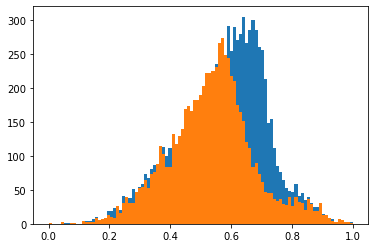

In [34]:
plt.hist(normal, bins=np.linspace(0.0, 1.0, num=100))
plt.hist(anormaly, bins=np.linspace(0.0, 1.0, num=100))
plt.show()

0.57367873 0.53687155
0.14457117 0.13999672


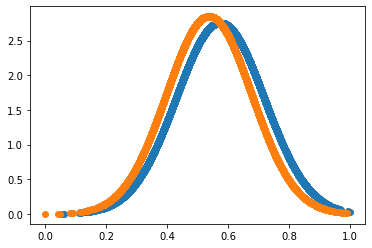

In [35]:
plt.plot(normal, norm.pdf(normal, np.mean(normal), np.std(normal)), 'o')
plt.plot(anormaly, norm.pdf(anormaly, np.mean(anormaly), np.std(anormaly)), 'o')

print(np.mean(normal), np.mean(anormaly))
print(np.std(normal), np.std(anormaly))

# 개구리는 안돼요(CIFAR-10)
- 지금까지 잘 따라오셨나요?

- 이번 프로젝트는 지금까지의 실습과 동일한 방법으로 CIFAR-10 데이터셋에 대해 진행해 보겠습니다. 여러분들이 만들어야 할 모델은 CIFAR-10의 10가지 클래스 중 개구리 라벨을 이상 데이터로 처리하는 모델입니다. 혹시 개구리가 출현할 경우 이를 감지하여 이상감지 경고를 발생시키는 개구리 감지 모델이라고 할 수 있겠습니다.

## 다음의 순서을 따라 진행해 주세요.

1. 이상감지용 데이터셋 구축 (개구리 데이터를 학습데이터셋에서 제외하여 테스트 데이터셋에 포함)
2. Skip-GANomaly 모델의 구현
3. 모델의 학습과 검증
4. 검증 결과의 시각화 (정상-이상 데이터의 anomaly score 분포 시각화, 적절한 threshold에 따른 이삼감지율 계산, 감지 성공/실패사례 시각화 포함)